<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
salary = pd.read_csv('https://raw.githubusercontent.com/notice4/google-colab-study/refs/heads/main/salary.csv')
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [2]:
## types
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [3]:
## missing values
salary.isnull().sum()

,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [4]:
## duplicates sums
salary.duplicated().sum()

np.int64(4)

In [5]:
## drop duplicates
print(salary.shape)
salary.drop_duplicates(inplace=True)
print(salary.shape)

(397, 6)
(393, 6)


In [ ]:
## blackbox (q1, q2, q3 ...)

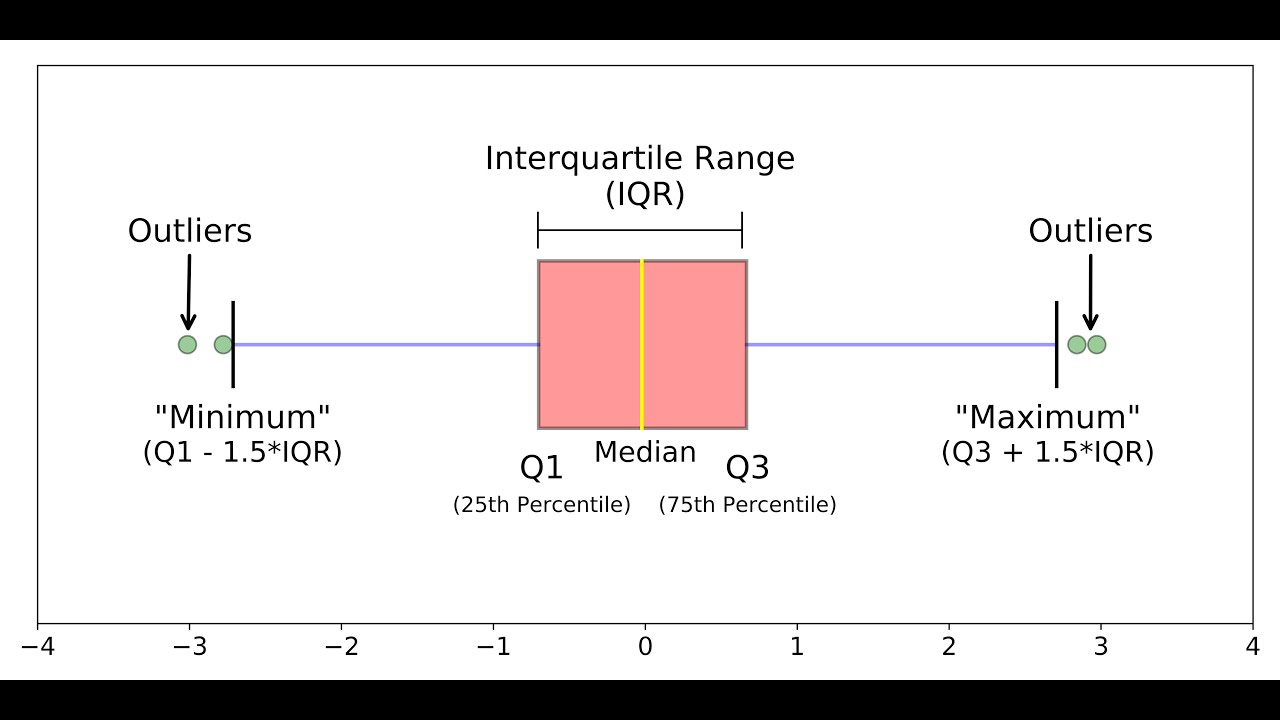

<Axes: >

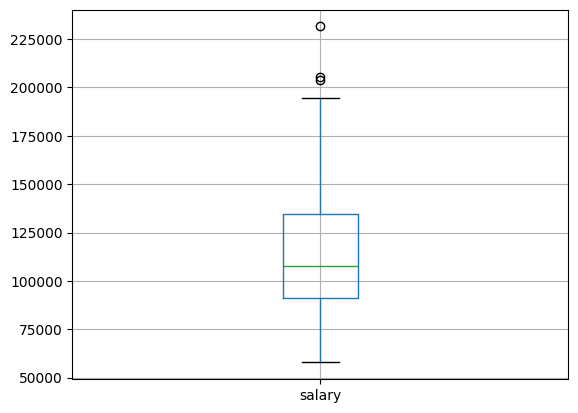

In [6]:
salary.boxplot(column='salary')

In [7]:
## q1, q3
q1 =salary['salary'].quantile(0.25)
q3 =salary['salary'].quantile(0.75)
IQR = q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
salary = salary[(salary['salary']>lower_bound) & (salary['salary']<upper_bound)]

In [8]:
salary.shape

(390, 6)

In [9]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [10]:
salary['rank'] = salary['rank'].map({'Prof':2, 'AssocProf':1, 'AsstProf':0})
salary['rank'].unique()

array([2, 0, 1])

In [11]:
salary['discipline'] = salary['discipline'].map({'B':1, 'A':0})
salary['discipline'].unique()

array([1, 0])

<Axes: xlabel='sex'>

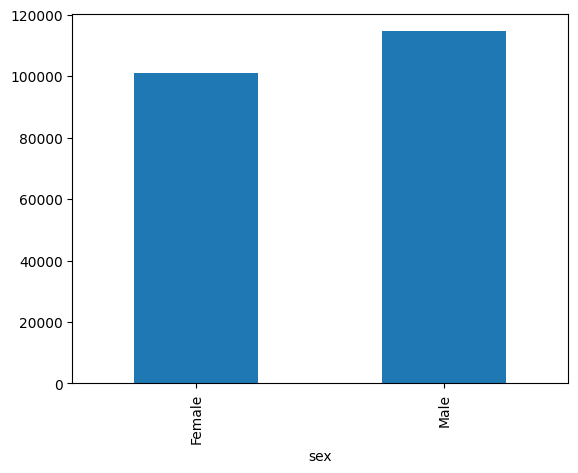

In [12]:
salary.groupby('sex')['salary'].mean().plot(kind='bar')

In [13]:
salary.drop('sex', axis=1, inplace=True)

In [14]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,0,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500


In [15]:
y = salary['salary'].values
X = salary.drop('salary', axis=1).values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)